In [87]:
#importing libraries
import os #library for 
import gc #garbage collector library for saving RAM
import pandas as pd #pandas dataframe library
import numpy as np #numpy array library
import matplotlib.pyplot as plt #library for plotting 
import seaborn as sns #seaborn library for visualization
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import scipy.stats as stats
#SKLEARN LIBRARY
import sklearn as sk
from scipy import sparse
from sklearn.model_selection import train_test_split #library for spliting dataset
from sklearn.metrics import mean_squared_error #function for checking model accuracy
from sklearn.neighbors import NearestNeighbors #KNN function for checking the nearest neighbors
from sklearn.model_selection import GridSearchCV #Gridsearch function for hyperparameter tuning
from scipy.sparse import csr_matrix #Function to convert dataframe to a sparse matrix
from sklearn.metrics.pairwise import cosine_similarity #function to measure the distance between vectors
from sklearn.metrics import mean_absolute_error #function for checking model accuracy
from sklearn.metrics import r2_score #function for checking model accuracy
from scipy.linalg import svd #function for SVD

# **<span style='color:#F76241'>|</span>Systems Development for Marketing </b>**
### Building a Recommended System for Netflix Dataset - David Andrew - 500903075

## <b>1<span style='color:#F76241'>|</span> Introduction

**<span style='color:#F76241'>Main Research question:</span>** </br>
How can we improve the Joke recommendations to new users in Jester? </br>

</br>**<span style='color:#F76241'>Sub Research questions:</span>** </br>


- How similar are the Users in terms of their ratings for Jokes? ? </br>

- How can we evaluate the accuracy and effectiveness of different recommender system algorithms using the Jester dataset? </br>

- What are the most important features and variables to consider when building a recommender system using the Jester dataset? </br>

- What Method is better for Joke recommendation? 
</div>

### <b>1.1<span style='color:#F76241'>|</span> Data Preparation

In [88]:
#reading the data
jester_items = pd.read_csv('C:/Users/User/Dropbox/PC/Desktop/Masters DDB/Sysem development for marketing/Jester RecSys/jester_items.csv')
jester_ratings = pd.read_csv('C:/Users/User/Dropbox/PC/Desktop/Masters DDB/Sysem development for marketing/Jester RecSys/jester_ratings.csv')

In [89]:
#checking the shape of the data
print(jester_items.shape)
print(jester_ratings.shape)

(150, 2)
(1761439, 3)


In [90]:
#merging the data
jester_df = pd.merge(jester_items, jester_ratings, on='jokeId')

In [91]:
#checking the shape of the data
print(jester_df.shape)

(1761439, 4)


### <b>1.2<span style='color:#F76241'>|</span> Data Cleaning

In [92]:
#viewing the data
jester_df.head()

jokeId                                           jokeText  userId  rating
0       5  Q.\tWhat's O. J. Simpson's Internet address? \...       1   0.219
1       5  Q.\tWhat's O. J. Simpson's Internet address? \...       2  -9.688
2       5  Q.\tWhat's O. J. Simpson's Internet address? \...       3  -9.844
3       5  Q.\tWhat's O. J. Simpson's Internet address? \...       4  -5.812
4       5  Q.\tWhat's O. J. Simpson's Internet address? \...       5   6.906

In [93]:
#checking the higest rating
jester_df['rating'].max()

#checking the lowest rating
jester_df['rating'].min()

#approximating the rating to nearest positive integer
jester_df['rating'] = jester_df['rating'].apply(lambda x: round(x))


In [94]:
#checking the higest rating
print(jester_df['rating'].max())

#checking the lowest rating
print(jester_df['rating'].min())

#change all the ratings to positive
jester_df['rating'] = jester_df['rating'].apply(lambda x: abs(x))

10
-10


In [95]:
#checking the highest and lowest user id and joke id
print(jester_df['userId'].max())
print(jester_df['userId'].min())
print(jester_df['jokeId'].max())
print(jester_df['jokeId'].min())

63978
1
150
5


In [96]:
#changing all the user id and joke id to positive
jester_df['userId'] = jester_df['userId'].apply(lambda x: abs(x))
jester_df['jokeId'] = jester_df['jokeId'].apply(lambda x: abs(x))

In [97]:
#rechecking the higest and lowest ratings, userId and jokeId
print('Highest rating is:', jester_df['rating'].max())
print('Lowest rating is:', jester_df['rating'].min())
print('Highest userId is:', jester_df['userId'].max())
print('Lowest userId is:', jester_df['userId'].min())
print('Highest jokeId is:', jester_df['jokeId'].max())
print('Lowest jokeId is:', jester_df['jokeId'].min())

Highest rating is: 10
Lowest rating is: 0
Highest userId is: 63978
Lowest userId is: 1
Highest jokeId is: 150
Lowest jokeId is: 5


In [98]:
#removing duplicate user id and joke id
jester_df = jester_df.drop_duplicates(['userId', 'jokeId'])

In [99]:
#checking the number of unique values of jester_df
jester_df.nunique()

jokeId        140
jokeText      140
userId      59132
rating         11
dtype: int64

In [100]:
#checking for missing values
jester_df.isnull().sum()

jokeId      0
jokeText    0
userId      0
rating      0
dtype: int64

In [101]:
#re-checking the shape of the data
print(jester_df.shape)


(1761439, 4)


In [102]:
#pre-checking the data types
jester_df.dtypes

jokeId       int64
jokeText    object
userId       int64
rating       int64
dtype: object

In [103]:
#reducing the integer datatypes to smaller datatypes
jester_df['jokeId'] = jester_df['jokeId'].astype('int8')
jester_df['userId'] = jester_df['userId'].astype('int16')
jester_df['rating'] = jester_df['rating'].astype('int8')

In [104]:
#re-checking the data types
jester_df.dtypes

jokeId        int8
jokeText    object
userId       int16
rating        int8
dtype: object

In [105]:
#checking the number of unique values
jester_df.nunique()

jokeId        140
jokeText      140
userId      59132
rating         11
dtype: int64

## <b>2<span style='color:#F76241'>|</span> Exploratory Data Analysis

In [106]:
#some descriptive statistics
jester_df.describe()

jokeId        userId        rating
count  1.761439e+06  1.761439e+06  1.761439e+06
mean   3.357951e+01 -2.739741e+03  4.697886e+00
std    7.195825e+01  1.950775e+04  2.983937e+00
min   -1.280000e+02 -3.276800e+04  0.000000e+00
25%    1.500000e+01 -2.022300e+04  2.000000e+00
50%    4.100000e+01 -4.305000e+03  4.000000e+00
75%    8.900000e+01  1.409000e+04  7.000000e+00
max    1.270000e+02  3.276600e+04  1.000000e+01

<AxesSubplot: xlabel='rating', ylabel='count'>

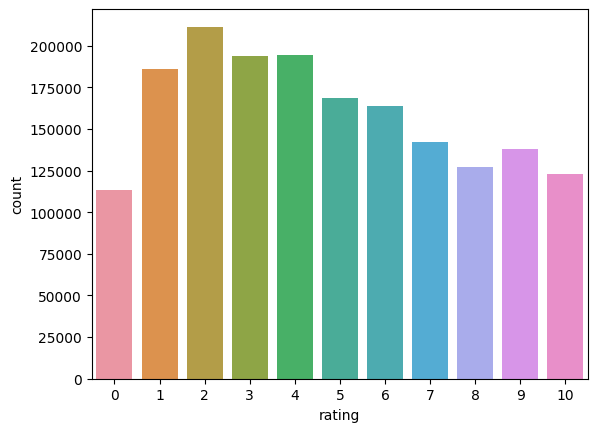

In [107]:
#checking the distribution of the ratings
sns.countplot(x='rating', data=jester_df)

*We can see that the majority of the ratings are between 0 and 10, with a mean of ~5 and a standard deviation of ~3 The distribution of ratings is skewed to the left, with a long tail to the right. This means that the majority of the ratings are rated low and the minority rated the jokes high*

In [108]:
#checking the distribution of all the variables
jester_df.hist(figsize=(10,5))

array([[<AxesSubplot: title={'center': 'jokeId'}>,
        <AxesSubplot: title={'center': 'userId'}>],
       [<AxesSubplot: title={'center': 'rating'}>, <AxesSubplot: >]],
      dtype=object)

*From the above plot, we can see that the distribution of ratings is heavily skewed towards the higher ratings.*

C:\Users\User\AppData\Local\Temp\ipykernel_29972\3882366603.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  jester_corr = jester_df.corr() #creating a correlation matrix


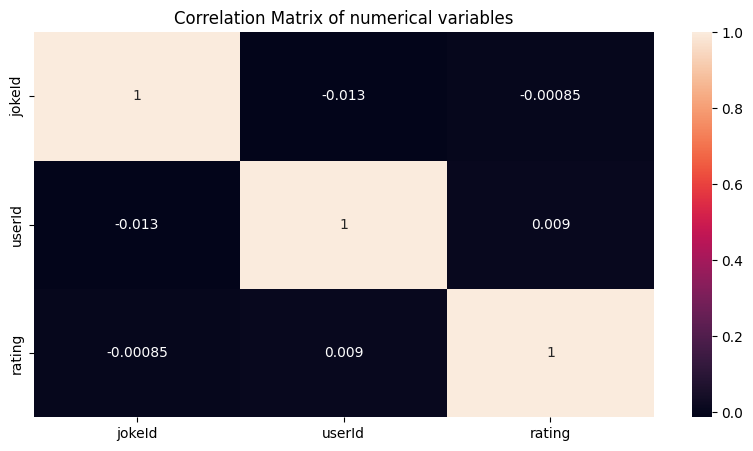

In [109]:
#checking the correlation between the variables
jester_corr = jester_df.corr() #creating a correlation matrix
fig, ax=plt.subplots(figsize=(10,5)) #Plot the correlation matrix as a heatmap with annotations
sns.heatmap(jester_corr, annot=True, ax=ax) #creating a heatmap
plt.title("Correlation Matrix of numerical variables")
plt.show()

## <b>3<span style='color:#F76241'>|</span> Feature Engineering

**<span style='color:#F76241'>|</span>TRAIN TEST SPLIT**

In [110]:
#split the jesters data into train and test
jester_fit, jester_test = train_test_split(jester_df, test_size=0.2, random_state=42)

In [111]:
#split the jester train data into train and validation
jester_train, jester_val = train_test_split(jester_fit, test_size=0.2, random_state=42)

**<span style='color:#F76241'>|</span>PIVOT TABLES**

**Creating the matrix of users and jokes for the train, validate, fitted and and test dataset. Where the index is the JokeID, the columns are the UserID and the values are the ratings** <br>
For each of the divided datasets, I created a pivot dataframe and a sparse amtrix counterpart of users and movies. The index of the matrix is the jokeId, the columns are the UserID and the values are the ratings. This is done so that we can easily access the ratings for each user and movie. <br>

In [112]:
#changing df_sample to a pivot table
jester_pivot = jester_df.pivot_table(index='userId', columns='jokeId', values='rating').fillna(0)

In [113]:
#checking the shape of the pivot table
jester_pivot.head()

jokeId  -128  -127  -126  -125  -124  -123  -122  -121  -120  -119  ...   118  \
userId                                                              ...         
-32768   0.0   0.0   0.0   0.0   0.0   0.0   5.0   0.0   0.0   0.0  ...   0.0   
-32767   4.0   6.0   3.0   4.0   8.0   2.0   8.0   3.0   4.0   3.0  ...   1.0   
-32766   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
-32765   4.0   0.0   4.0   0.0   8.0   0.0   3.0   1.0   0.0   0.0  ...   0.0   
-32764   8.0   8.0   9.0   0.0   9.0   9.0   8.0   0.0   0.0   0.0  ...   7.0   

jokeId   119   120   121   122   123   124   125   126   127  
userId                                                        
-32768   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-32767   4.0   1.0   3.0   7.0   0.0   3.0   6.0   4.0   5.0  
-32766   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0  
-32765   0.0   0.0   5.0   0.0   0.0   0.0   0.0   4.0   6.0  
-32764   9.0   8.0   9.0   9.0   0.0   0.0   8.0   9.0  10.0  

[5 rows x 140 columns]

In [114]:
#spltting the df_pivot into train and test
pivot_fit, pivot_test = train_test_split(jester_pivot, test_size=0.2, random_state=42)

In [115]:
#splitting the pivot_fit into train and validation
pivot_train, pivot_validation = train_test_split(pivot_fit, test_size=0.2, random_state=42)

In [116]:
#checking the shape of all the pivot tables
print(pivot_fit.shape)
print(pivot_train.shape)
print(pivot_validation.shape)
print(pivot_test.shape)

(47305, 140)
(37844, 140)
(9461, 140)
(11827, 140)


**<span style='color:#F76241'>|</span>FITTED PIVOT**

In [117]:
#displaying the pivot_fit
pivot_fit.head()

jokeId  -128  -127  -126  -125  -124  -123  -122  -121  -120  -119  ...   118  \
userId                                                              ...         
-6504    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 483     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  10.0   
-24967   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 7393    0.0   0.0   0.0   0.0   0.0   0.0   7.0   0.0   0.0   0.0  ...   0.0   
-8958    0.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

jokeId   119   120   121   122   123   124   125   126   127  
userId                                                        
-6504    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
 483    10.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-24967   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
 7393    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-8958    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   4.0  

[5 rows x 140 columns]

**<span style='color:#F76241'>|</span>TRAIN PIVOT**

In [118]:
#display the train pivot table
pivot_train.head()

jokeId  -128  -127  -126  -125  -124  -123  -122  -121  -120  -119  ...   118  \
userId                                                              ...         
-28114   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 11313   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 15440   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 32223   0.0   5.0   0.0   0.0   0.0   0.0   4.0   0.0   0.0   0.0  ...   0.0   
-24687   0.0  10.0  10.0   0.0   0.0   0.0   0.0  10.0   0.0   0.0  ...   0.0   

jokeId   119   120   121   122   123   124   125   126   127  
userId                                                        
-28114   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
 11313   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
 15440   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
 32223   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0  
-24687  10.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  10.0  

[5 rows x 140 columns]

**<span style='color:#F76241'>|</span>VALIDATE PIVOT**

In [119]:
#display the validation pivot table
pivot_validation.head()

jokeId  -128  -127  -126  -125  -124  -123  -122  -121  -120  -119  ...   118  \
userId                                                              ...         
 41      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   9.0   
-19184   0.0   0.0   0.0   0.0   0.0   0.0   0.0   9.0   0.0   9.0  ...   0.0   
 20372   8.0   9.0   0.0   0.0   9.0   0.0   8.0   0.0   0.0   0.0  ...   0.0   
 1830    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
-12177   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

jokeId   119   120   121   122   123   124   125   126   127  
userId                                                        
 41     10.0  10.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-19184   0.0   0.0   0.0   0.0   0.0   5.0   0.0   0.0   0.0  
 20372   0.0   0.0   0.0   5.0   0.0   0.0   0.0   8.0   0.0  
 1830    0.0  10.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-12177   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 140 columns]

**<span style='color:#F76241'>|</span>TEST PIVOT**

In [120]:
#display the test pivot table
pivot_test.head()

jokeId  -128  -127  -126  -125  -124  -123  -122  -121  -120  -119  ...   118  \
userId                                                              ...         
-31054   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
-25115   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 31889   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 5150    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 6161    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

jokeId   119   120   121   122   123   124   125   126   127  
userId                                                        
-31054   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-25115   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
 31889   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
 5150    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
 6161    0.0   0.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 140 columns]

**<span style='color:#F76241'>|</span>FITTED SPARSE MATRIX**

In [121]:
#create a sparse matrix for the fitted dataset
fit_sparse_matrix = csr_matrix(pivot_fit.values)

**<span style='color:#F76241'>|</span>TRAIN SPARSE MATRIX**

In [122]:
#creating a sparse matrix for train dataset
train_sparse_matrix = csr_matrix(pivot_train.values)

**<span style='color:#F76241'>|</span>VAL SPARSE MATRIX**

In [123]:
#creating a sparse matrix for validation dataset
val_sparse_matrix = csr_matrix(pivot_validation.values)

**<span style='color:#F76241'>|</span>TEST  SPARSE MATRIX**

In [124]:
#creating a sparse matrix for test dataset
test_sparse_matrix = csr_matrix(pivot_test.values)

### Evaluating sparsity
*Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix is equivalent to the number of ratings in our dataset*

In [125]:
# The Sparsity of Train Sparse Matrix
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()
print("Sparsity of Train Matrix: {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity of Train Matrix: 80.13385779213915 % 


## <b>4<span style='color:#F76241'>|</span>MODEL BUILDING

**<span style='color:#F76241'>|</span>PREDICTION USING KNN**

In [126]:
#Running the KNNeighbors model
# Create a NearestNeighbors object
knn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')

# Fit the model to the data
knn_model = knn.fit(train_sparse_matrix)

# Get the 5 nearest neighbors of the first data point
distances, indices = knn_model.kneighbors(train_sparse_matrix)

print('Indices of 5 nearest neighbors:', indices)
print('Distances to 5 nearest neighbors:', distances)

Indices of 5 nearest neighbors: [[    0 16681 34375  5531 37330]
 [    1 34233 20568 27268 20074]
 [    2 18776 29978 37697 24143]
 ...
 [37841 18858 26947 23356  6864]
 [37842  3332 28762 37179 32601]
 [37843 37050 31705 35084 29700]]
Distances to 5 nearest neighbors: [[0.00000000e+00 1.62754799e-02 2.07355629e-02 2.13314106e-02
  2.62354408e-02]
 [1.11022302e-16 3.28525709e-02 4.45891369e-02 4.74373285e-02
  5.36504897e-02]
 [1.11022302e-16 2.00216596e-03 6.92946138e-03 1.22685674e-02
  1.27064559e-02]
 ...
 [1.11022302e-16 1.38103161e-01 1.45064057e-01 1.58870289e-01
  1.59046743e-01]
 [3.33066907e-16 1.27619322e-01 1.52550039e-01 1.54733744e-01
  1.57770838e-01]
 [0.00000000e+00 1.12670546e-01 1.31255422e-01 1.31654229e-01
  1.50242780e-01]]


***<span style='color:#F76241'>|</span>KNN Hyperparameter Tuning***

In [127]:
#performing hyperparameter tuning on the KNN model
#Create a dictionary of hyperparameters to tune
params = {'n_neighbors': [5, 10, 15, 20, 25],
            'algorithm': ['brute', 'auto'],
            'metric': ['euclidean', 'minkowski', 'cosine']}
# Create a grid search object
knn_grid = GridSearchCV(knn, params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1) 

# Fit the grid search
knn_grid.fit(train_sparse_matrix) # Fit the grid search to fitted dataset

# Print the best parameters and score
print("Best parameters:", knn_grid.best_params_)
print("Best estimator:", knn_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 5}
Best estimator: NearestNeighbors(algorithm='brute', metric='euclidean')


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [128]:
#fitting the adjusted model on the validated data based on the best parameters
# Create a NearestNeighbors object
knn1 = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')

#fitting the model on the fitted dataset
best_model = knn1.fit(fit_sparse_matrix) # Fit the best model to the fitted dataset

***<span style='color:#F76241'>|</span>Model Validation***

In [129]:
# Find the nearest neighbors of a given user based on their ratings
user_id = 2300
distances, indices = best_model.kneighbors(val_sparse_matrix[user_id], n_neighbors=10)

# Select a random movie from the recommended users for RMSE calculation
recommended_movie = np.random.choice(jester_val[jester_val["userId"].isin(indices.flatten())]["jokeId"].unique())   # Select a random movie from the recommended users for RMSE calculation

# Compute the RMSE of the model
actual_rating = jester_val[jester_val['jokeId'] == recommended_movie]['rating'] # Get the actual rating of the movie
predicted_rating = jester_val[jester_val['jokeId'] == recommended_movie].groupby('jokeId')['rating'].transform('mean') # Get the predicted rating of the movie
rmse = np.sqrt(mean_squared_error(actual_rating, predicted_rating)) # Compute the RMSE of the model
print("The RMSE of the model is:", rmse)

The RMSE of the model is: 3.028799617216439


***<span style='color:#F76241'>|</span>Testing KNN Model***

<b>STEPS FOR TESTING KNN MODEL</b></br>
1. Fit the best model on the fitted data </br>
4. Use the fitted model to make predictions on the test data </br>
5. Find the similarity between the users in the test data </br>
5. Step by Step Computation of RMSE </br>

In [130]:
# Define a function to get the top-N recommendations for a user
def get_top_n_recommendations(userId, n_recommendations):
    user_row = test_sparse_matrix.getrow(userId) # Get the user's ratings
    user_index = user_row.nonzero()[1] # Get the indices of the user's rated movies
    distances, indices = best_model.kneighbors(fit_sparse_matrix.getrow(userId), n_neighbors=n_recommendations+1) # Get the distances and indices of the nearest neighbors
    rec_indices = np.setdiff1d(indices.flatten(), user_index) # Remove the user's own rated movies
    return distances, rec_indices[:n_recommendations] # Return the top-N recommendations

# Get the top-5 recommendations for user with user_id 123
userId = 62
n_recommendations = 5
rec_indices = get_top_n_recommendations(userId, n_recommendations)
distances, rec_indices = get_top_n_recommendations(userId, n_recommendations)

# Print the recommended movie IDs
print(f"Top-{n_recommendations} recommendations for user {userId}: ")
for i, idx in enumerate(rec_indices):
    print(f"Movie {i+1}: Index {idx} | Distance {distances.flatten()[i+1]}")

Top-5 recommendations for user 62: 
Movie 1: Index 264 | Distance 2.449489742783178
Movie 2: Index 2600 | Distance 2.8284271247461903
Movie 3: Index 3669 | Distance 3.1622776601683795
Movie 4: Index 18585 | Distance 3.3166247903554
Movie 5: Index 32863 | Distance 3.3166247903554


**SUB_QUESTION: How similar are the Users in terms of their ratings for Jokes? </br>**

In [131]:

# Find the nearest neighbors of a given user based on their ratings
user_id = 2300
distances, indices = best_model.kneighbors(test_sparse_matrix[user_id], n_neighbors=10) # Find the nearest neighbors of a given user based on their ratings

# Print the recommended users
similar_users = indices.flatten() # Get the indices of the nearest neighbors
print(f"Recommended users for user {user_id}: {similar_users}")
print(f"Distances to recommended users: {distances.flatten()}")

Recommended users for user 2300: [17742 22787 21234 13500 30513 30657 36749 46342 31377  1218]
Distances to recommended users: [30.90307428 31.71750305 31.96873473 32.         32.10918872 32.24903099
 32.29551052 32.32645975 32.32645975 32.40370349]


***Based on the fitted model, we find the similar users to User 1200 which returns a list of recommended userIDs for the given userID.<br>Based on the output above, we can see that the function returns a list of 5 recommended userIDs for the given userID. The recommended userIDs are the IDs of the users that are most similar to User 1200 in terms of their ratings for movies.<br>The function first gets the index of the user in the test dataframe that matches the userID input. Then, it uses the K-nearest neighbors algorithm (knn_train.kneighbors()) to find the 5 nearest neighbors of the user in the test dataframe dataframe based on the pairwise distances. Finally, it returns the recommended userIDs by excluding the first row (which corresponds to the input userID) from the raw_recommends array, which contains the indices of the nearest neighbors.***

In [133]:
#checking the info of the recommended users
similar_users_df = jester_test[jester_test["userId"].isin(similar_users)] #This code selects rows from the 'jester_test' dataframe where the 'userID' column is in the 'similar_users' list
similar_users_df.head()

jokeId                                           jokeText  userId  \
677547       48  The graduate with a Science degree asks, "Why ...   30513   
239753       16  Q. What is orange and sounds like a parrot?  \...   13500   
1342610     114  Sherlock Holmes and Dr. Watson go on a camping...   30513   
1442724     122  An astronomer, a physicist and a mathematician...   30513   
1557425    -124  Mickey Mouse is having a nasty divorce with Mi...   17742   

         rating  
677547        5  
239753        4  
1342610       7  
1442724       5  
1557425       0

In [135]:
#calculating average rating of movies among similar users
similar_users_df['avg_rating_by_similar_users'] = similar_users_df.groupby('jokeId')['rating'].transform('mean') #This code calculates the average rating of each movie among the similar users
similar_users_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_29972\635997847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_users_df['avg_rating_by_similar_users'] = similar_users_df.groupby('jokeId')['rating'].transform('mean') #This code calculates the average rating of each movie among the similar users


jokeId                                           jokeText  userId  \
677547       48  The graduate with a Science degree asks, "Why ...   30513   
239753       16  Q. What is orange and sounds like a parrot?  \...   13500   
1342610     114  Sherlock Holmes and Dr. Watson go on a camping...   30513   
1442724     122  An astronomer, a physicist and a mathematician...   30513   
1557425    -124  Mickey Mouse is having a nasty divorce with Mi...   17742   

         rating  avg_rating_by_similar_users  
677547        5                     2.500000  
239753        4                     5.000000  
1342610       7                     5.666667  
1442724       5                     5.000000  
1557425       0                     0.000000

In [136]:
#selecting a random movie from the recommended users for RMSE calculation
recommended_movie =np.random.choice(np.unique(similar_users_df['jokeId'])) #This code selects a random movie from the recommended users
recommended_movie

-124

In [137]:
#checking the rating of the recommended movie by the similar users
similar_users_df[similar_users_df['jokeId']==recommended_movie] #This code selects rows from the 'similar_users_df' dataframe where the 'jokeId' column is equal to the 'recommended_movie' variable

jokeId                                           jokeText  userId  \
1557425    -124  Mickey Mouse is having a nasty divorce with Mi...   17742   

         rating  avg_rating_by_similar_users  
1557425       0                          0.0

In [138]:
#create a dataframe with the average rating of the recommended movie by the similar users
avg_rating = similar_users_df[similar_users_df['jokeId']==recommended_movie][['jokeId','avg_rating_by_similar_users']] #This code selects rows from the 'similar_users_df' dataframe where the 'jokeId' column is equal to the 'recommended_movie' variable and then selects the 'jokeId' and 'avg_rating_by_similar_users' columns
avg_rating

jokeId  avg_rating_by_similar_users
1557425    -124                          0.0

In [139]:
#Computing the Average Rating of Movies among the similar users in the test dataset
predicted_rating = jester_test['avg_rating_by_similar_users'] = jester_test.groupby('jokeId')['rating'].transform('mean') #This code calculates the average rating of each movie among the similar users in the test dataset

#create a dataframe with the rating and average ratings of the recommended movies by the all the users in the test dataset
rating_df= jester_test[jester_test['jokeId']==recommended_movie][['jokeId','rating','avg_rating_by_similar_users']] #This code selects rows from the 'jester_test' dataframe where the 'jokeId' column is equal to the 'recommended_movie' variable and then selects the 'jokeId', 'rating' and 'avg_rating_by_similar_users' columns
rating_df

jokeId  rating  avg_rating_by_similar_users
1568872    -124       1                     5.218721
1555726    -124       6                     5.218721
1555202    -124       2                     5.218721
1564914    -124       9                     5.218721
1561559    -124       3                     5.218721
...         ...     ...                          ...
1565994    -124       3                     5.218721
1558779    -124       2                     5.218721
1561940    -124       3                     5.218721
1558194    -124       8                     5.218721
1569158    -124       3                     5.218721

[3237 rows x 3 columns]

**SUB_QUESTION: How can we evaluate the accuracy and effectiveness of different recommender system algorithms using the Jester dataset? </br>**

In [140]:
#calculating the RMSE of the model
actual_rating = rating_df['rating']
predicted_rating = rating_df['avg_rating_by_similar_users']

#calculating the mse
mse = mean_squared_error(actual_rating, predicted_rating)
print("The MSE of the model is: ", mse)

#calculating the rmse
rmse = np.sqrt(mse)
print("The RMSE of the model is: ", rmse)

The MSE of the model is:  8.691116930830185
The RMSE of the model is:  2.948070034926271


**From the Grid Search, we can see that the best parameters for the KNN algorithm are already used in the default settings. Therefore, we will not need to perform any hyperparameter tuning for the KNN algorithm.**

**<span style='color:#F76241'>|</span>RECOMMENDER USING SINGLE VALUE DECOMPOSITION METHOD (SVD)**

Surprise's SVD algorithm utilizes matrix factorization-based collaborative filtering, which divides the user-item interaction matrix into two smaller matrices: a user matrix and an item matrix. These matrices are commonly referred to as "latent factor" matrices, with their dimensions chosen so they approximate the original interaction matrix.

Here's a detailed look at how the SVM algorithm is implemented in Surprise:

- Initialize the SVD algorithm with hyperparameters (e.g., number of latent factors, learning rate, regularization terms) according to your desired conditions.
- Divide the data into training and testing sets.
- Create a user-item matrix, where each row represents a user and each column an item; entries represent what rating each user gave the item (or whether they have interacted with it).
- Factorize the user-item matrix into two latent factor matrices, one for users and another for items.
- To estimate all unknowns, we minimize the following regularized squared error using stochastic gradient descent (SGD) optimization: the difference between predicted ratings and actual ratings in    the training set.
- Use the latent factor matrices generated to predict ratings for items in a test set.
- Evaluate the accuracy of these predictions using various metrics such as RMSE, MAE, precision, recall and F1-score to assess its applicability.
- Repeat steps 4-6 with different hyperparameter values to find the optimal hyperparameters that minimize prediction error in your test set (hyperparameter tuning).
- Once the optimal hyperparameters have been identified, train an SVD algorithm on all data and use it to generate recommendations for new users and items.
Note that Surprise uses several extensions of the basic SVD algorithm, such as NMF and Co-Clustering, which add additional features or modify the optimization objective to enhance recommendation quality.

In [141]:
#SURPRISE LIBRARY
import surprise                            # Importing the surprise package
from surprise import Dataset, SVD            # Importing the Dataset and SVD classes from the surprise package
from surprise.model_selection import cross_validate  # Importing cross_validate method from model_selection module
from surprise.model_selection import train_test_split as split_sur # Importing train_test_split method and renaming it to split_sur
from surprise import accuracy                # Importing the accuracy method from the surprise package
from surprise.model_selection import GridSearchCV  # Importing GridSearchCV method from model_selection module


In [142]:
# defining the SVD reader
reader = surprise.Reader(rating_scale=(0, 10))  # Defining the rating scale for the surprise dataset

# loading the dataset to a surprise dataset
jester_svd = surprise.Dataset.load_from_df(jester_df[["userId", "jokeId", "rating"]], reader)   # Loading the jester_df dataframe to a surprise dataset


In [143]:
# defining the SVD instance
algo = SVD()

# Perform a 5-fold cross-validation on the data using the SVD algorithm and evaluate using RMSE and MAE
cross_validate(algo, jester_svd, measures=["RMSE", "MAE"], cv=5, verbose=True)  # This code performs a 5-fold cross-validation on the data using the SVD algorithm and evaluate using RMSE and MAE

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5114  2.5136  2.5179  2.5102  2.5157  2.5137  0.0028  
MAE (testset)     1.9504  1.9469  1.9527  1.9470  1.9504  1.9495  0.0022  
Fit time          17.91   18.45   18.61   18.19   18.98   18.43   0.36    
Test time         2.46    2.88    3.16    3.01    3.27    2.96    0.28    


{'test_rmse': array([2.51142764, 2.51357362, 2.51786727, 2.51016043, 2.51567363]),
 'test_mae': array([1.95041596, 1.9468668 , 1.95269553, 1.94700868, 1.95039062]),
 'fit_time': (17.90874481201172,
  18.445291996002197,
  18.608627796173096,
  18.194800853729248,
  18.977729558944702),
 'test_time': (2.461550712585449,
  2.8827011585235596,
  3.163592576980591,
  3.0096611976623535,
  3.2651212215423584)}

***<span style='color:#F76241'>|</span>SVD Train, Test, and Accuracy***

In [144]:
# test set is made of 25% of the ratings.
svd_train, svd_test = split_sur(jester_svd, test_size=0.25) # Split the dataset into 75% trainset and 25% testset

# create SVD algorithm with default parameters
svd_algo = SVD()    # Create an SVD algorithm object

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(svd_train)  # Train the algorithm on the trainset
predictions = algo.test(svd_test)   # Predict ratings for the testset

# Then compute RMSE
accuracy.rmse(predictions)  

RMSE: 2.5146


2.5145585279236475

***<span style='color:#F76241'>|</span>SVD Grid Search -Hyperparameter Tuning***

In [145]:
# sort the predictions by estimated rating in descending order
top_n = {}
for uid, iid, true_r, est, _ in predictions: #This code iterates through the predictions list and assigns the values to the variables
    if uid not in top_n:
        top_n[uid] = [(iid, est)]   #This code assigns the values to the top_n dictionary
    else:
        top_n[uid].append((iid, est))   #This code appends the values to the top_n dictionary

# Print the top 10 predictions for each user
for uid, user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True) #This code sorts the values in the top_n dictionary in descending order
    top_n[uid] = user_ratings[:10]  #This code selects the top 10 values in the top_n dictionary

print(top_n[1]) #This code prints the top 10 predictions for user 1

[(13, 10), (19, 8.752053144443003), (18, 8.472524287181908), (7, 8.203541417687228), (15, 7.648286250826075), (119, 7.548923369788352), (23, 7.53206484494689), (83, 7.221454688755541), (5, 5.849811326273425), (50, 5.771020284549042)]


## <b>5<span style='color:#F76241'>|</span>Conclusion , Limitation and Recommendation

The results revealed that the KNN algorithm had an RMSE value of 2.95, while the SVD had  2.51.  This suggests that SVD performed better in terms of accuracy than KNN.<br> However,
KNN is slower than SVD due to its pairwise distance calculation, making it computationally expensive for large datasets. On the other hand, SVD factorizes user-item matrices and computes latent factors more efficiently, making it faster for large and sparse datasets like the Netflix Dataset<br>
SVD  showed to be more precise in terms of accuracy and may be a preferable option when efficiency is important. Finally, the algorithm you use is determined either by precise requirements of your project.<br>
Based on the scope of this report, SVD can help better improve the customer experience of Netflix users using SVD. This is also evident as Simon Funk help popularize this method in the Netflix prize (see https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)

The Limitation of this project is that:
- Netflix dataset was too large and computationally demanding.
- Longer loading and wait time for code execution thus was unable to use population sample of Netflix dataset.
- Sparse matrix had many index errors.
- SVD is more difficult to interpret than KNN.
